# Coding Block 1 - Random Forests

### Load the packages

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
'''
...
'''

'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data.

In [6]:
diab=pd.read_csv('diabetes.csv')
diab_cleaned=pd.read_csv('diabetes_cleaned.csv')

### Split the data and train a Random Forest model

In [ ]:
# Function to train and evaluate random forest model
def train_evaluate_rf(data, dataset_name):
    # Split the data into features and target
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Create and train the model with default parameters first
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"=== Random Forest Results for {dataset_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance - {dataset_name}')
    plt.tight_layout()
    plt.show()
    
    # Return the model and feature importance for further analysis
    return rf, feature_importance

# Hyperparameter tuning function
def tune_rf_hyperparameters(data, dataset_name):
    # Split the data
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    param_gridSimple {
        'n_estimators': [100],
        'max_depth': [10, 20],
        'min_samples_split': [10],
        'min_samples_leaf': [2, 4]
    }
    
    # Create the grid search
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_gridSimple, 
                              cv=5, n_jobs=-1, scoring='accuracy')
    
    # Fit the grid search
    print(f"\n=== Hyperparameter Tuning for {dataset_name} ===")
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
    
    # Evaluate the best model
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Test Accuracy with Best Parameters: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix for best model
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Tuned) - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance for best model
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance (Tuned) - {dataset_name}')
    plt.tight_layout()
    plt.show()
    
    return best_rf, feature_importance

### Train and optimize hyperparameters

Training and evaluating models with default parameters...
=== Random Forest Results for Original Dataset ===
Accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.67      0.55      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



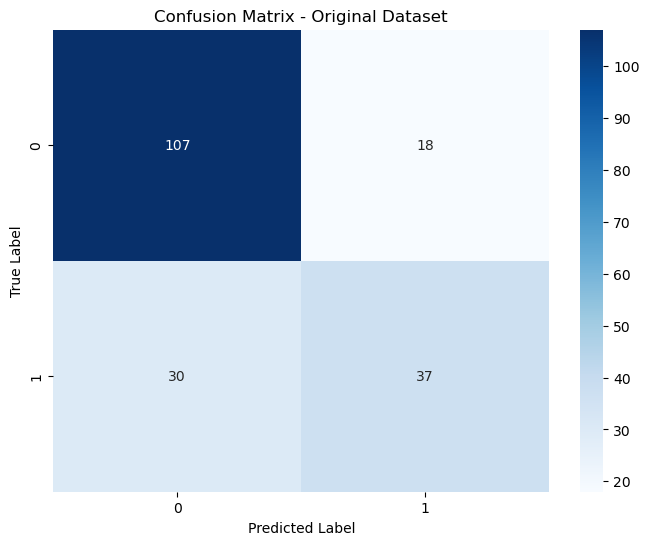

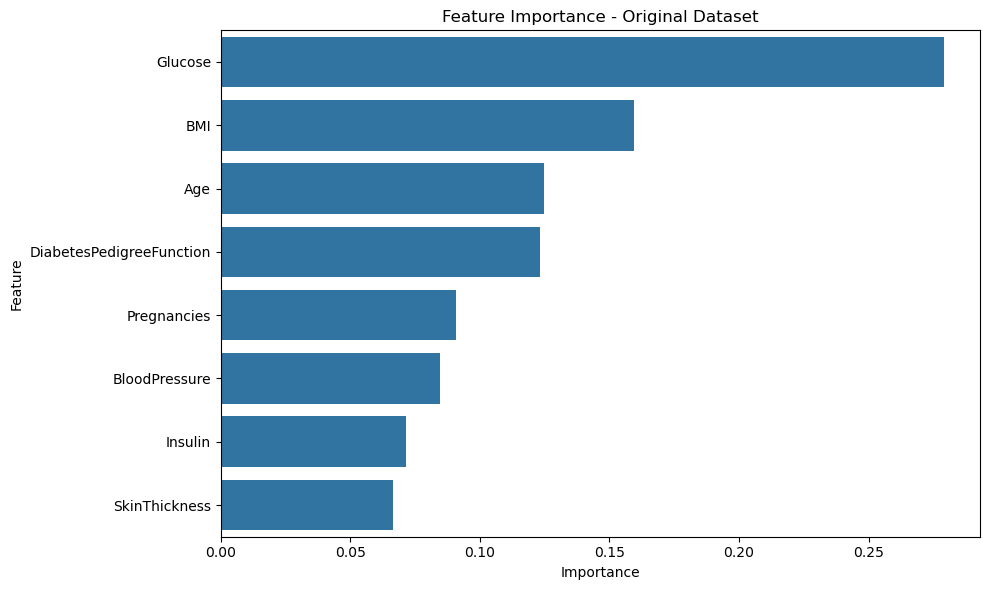

=== Random Forest Results for Cleaned Dataset ===
Accuracy: 0.7448

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



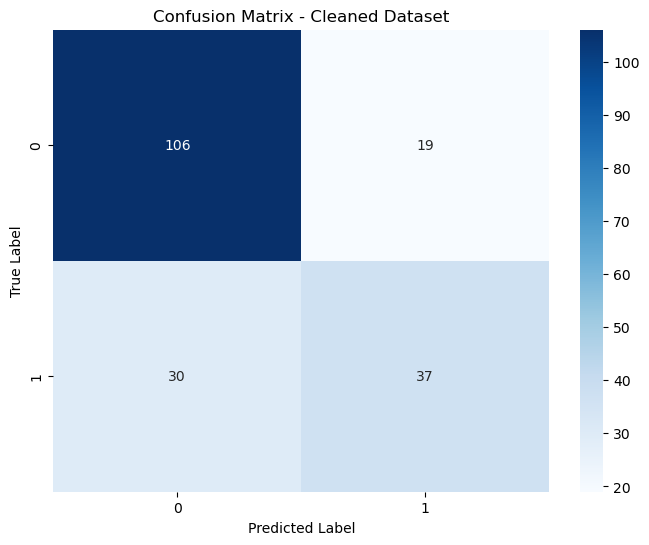

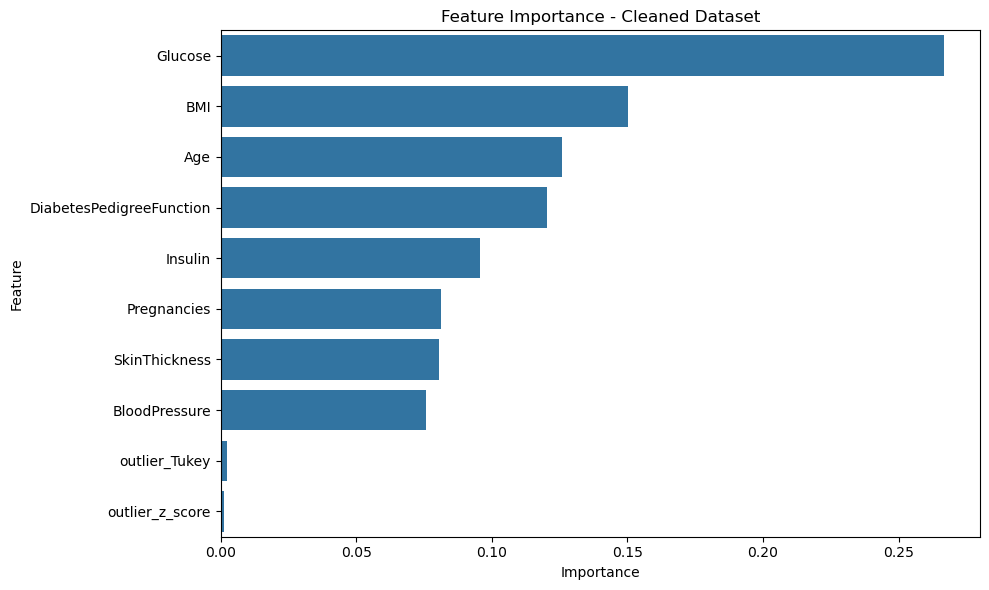


Performing hyperparameter tuning...

=== Hyperparameter Tuning for Original Dataset ===


KeyboardInterrupt: 

In [8]:
# 1. First, train and evaluate models with default parameters
print("Training and evaluating models with default parameters...")
rf_original, importance_original = train_evaluate_rf(diab, "Original Dataset")
rf_cleaned, importance_cleaned = train_evaluate_rf(diab_cleaned, "Cleaned Dataset")

# 2. Hyperparameter tuning for both datasets
print("\nPerforming hyperparameter tuning...")
best_rf_original, best_importance_original = tune_rf_hyperparameters(diab, "Original Dataset")
best_rf_cleaned, best_importance_cleaned = tune_rf_hyperparameters(diab_cleaned, "Cleaned Dataset")

### Feature importance plot and classification reports

In [ ]:
# 3. Compare the models and feature importance
print("\n=== Model Comparison ===")
# Compare top features
print("Top 3 Important Features (Original Dataset):")
print(importance_original.head(3))
print("\nTop 3 Important Features (Cleaned Dataset):")
print(importance_cleaned.head(3))
print("\nTop 3 Important Features (Tuned Original Dataset):")
print(best_importance_original.head(3))
print("\nTop 3 Important Features (Tuned Cleaned Dataset):")
print(best_importance_cleaned.head(3))

# 4. Comparison plot of feature importance between original and cleaned datasets
plt.figure(figsize=(12, 8))
feature_names = diab.drop('Outcome', axis=1).columns

# Get the feature importance values
original_importance = best_rf_original.feature_importances_
cleaned_importance = best_rf_cleaned.feature_importances_

# Create a DataFrame for the comparison plot
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Original Dataset': original_importance,
    'Cleaned Dataset': cleaned_importance
})

# Melt the DataFrame for easier plotting
melted_df = pd.melt(comparison_df, id_vars=['Feature'], 
                    value_vars=['Original Dataset', 'Cleaned Dataset'],
                    var_name='Dataset', value_name='Importance')

# Sort by feature names to align bars
melted_df = melted_df.sort_values('Feature')

# Create the grouped bar chart
sns.barplot(x='Feature', y='Importance', hue='Dataset', data=melted_df)
plt.title('Feature Importance Comparison: Original vs. Cleaned Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Visualize the decision boundary (for a pair of top features)
def plot_decision_boundary(model, X, y, feature1, feature2, dataset_name):
    # Use only the two most important features
    X_reduced = X[[feature1, feature2]]
    
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X_reduced[feature1].min() - 1, X_reduced[feature1].max() + 1
    y_min, y_max = X_reduced[feature2].min() - 1, X_reduced[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Plot the data points
